# PHOTO-ELECTORN DETECTION BY CATHODE AND MEMBRANE MODULES

The notebook takes the first sheet from the link to the saturation analysis Google Spreadsheet
(https://docs.google.com/spreadsheets/d/1BewrMeG0FQHEWywyAKXJGsJ9_qJMtquZ9kjCPlbv4n4/edit?usp=sharing).

The main features for each run done during period 20-28 august are shown in the table: energy, target, level of high and low preassure for Cherenkov trigger, type of particle depending on the region indicated by the Cherenkov thresholds. For each module, the number of photolectrons detetcted by event by the pair of channels is calculated as the ratio between the energy collected (charge: integral of the wfset) and the single photoelectron charge. The collected data is specific for each type of configuration of the Cherenkov triggers, so to being able to recognise the impact on the detectors operated by the dif-
ferent types of particles.
P.S. From the signal only not saturated wfs are selected. Still, a small part of the saturated wfs caused by the cold electronics are still taken to calculate the charge, but these are not abundant (only present in the membrane) and their impact not relevant.

The aim of this notebook is taking the infos registered in the spreadsheet to create histograms, representing #peVSmodules. Would be nice to have a 3D visualisation of the histograms as a lego plot, taking into account the real position of the modules in the real ProtoDUNE-VD detector.

Other plot represents the total number of pe detected by the PDS VS the energy of the single run. It represents the energy loss in terms of total photoelectrons emetted in the specific run. It should be linear, since the more energy the particles have, the more photoelectrons should be produced. But a saturation effect is expected by the simulations starting from 2 GeV.

The idea would be to compare the experimental data to the results coming from a simulation of the detection system, to see if they are comparable or not.

In [35]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os

In [36]:
'''
ORIGINAL DATAFRAME
'''
#load the csv file from public directory and create the pandas DataFrame
saturation_file = "/afs/cern.ch/work/l/liacob/public/saturation_hist/modules_pe.csv"
df_original = pd.read_csv(saturation_file, sep=",")

#exctract the name of the modules frm the DataFrame
modules = df_original.columns[7:-1].tolist()

# Histograms based on run number

In [37]:
'''
SELECTION OF THE RUN
'''
run = 39046

In [38]:
#filter the DataFrame creating another one just for the selected run
df_run = df[df.iloc[:, 0] == run]
df_run

,Run,Energy,Target,LP,HP,CH,Part,M5,M6,M1,...,C3,C5,C8,C7,C6,M3,M4,M7,M8,Sum
8,39046,0.5,Cu,5.0,14,Total,total,68.251075,144.575238,487.95898,...,2950.929059,612.004582,1462.920697,670.362245,931.570855,226.936240,602.399399,48.005502,237.787515,12880.764671
9,39046,0.5,Cu,5.0,14,HL,e,60.548396,140.801141,476.07818,...,2984.653729,606.052030,1385.922215,648.791286,916.234343,229.081382,599.277180,48.745341,253.868304,12738.806959
10,39046,0.5,Cu,5.0,14,HLx,no_particle,573.113729,576.902210,913.17105,...,2139.927168,866.559705,2295.610248,967.324136,1069.327079,80.452529,607.870562,-0.463490,108.767947,16880.128111
11,39046,0.5,Cu,5.0,14,HxLx,"mu,pi,pr",84.589731,52.945146,729.27634,...,1452.569890,624.898619,2999.193085,1065.496281,1268.969807,112.140236,691.500120,43.619402,90.499959,13676.559870


In [39]:
'''
#SELECTION OF ONE SINGLE TRIGGER

#ch_trigger selected: Total, HL, HxL, HxLx
ch_trigger = 'Total'

#filter the DataFrame of the run creating another one just for the selected cherenkov trigger region
df_run_ch = df_run[df_run.iloc[:, 5] == ch_trigger]

#type of particle selected by the ch_trigger choice
part = df_run_ch.iloc[0]['Part']

#exctraction of the #pe for each module as an array
pes = df_run_ch.iloc[0, 7:-1].to_numpy(dtype=np.float64)

#histogram
plt.figure(figsize=(8,5))
plt.title('Histogram - RUN = {:}: ChTriggers = {:}, Particles = {:}'.format(run, ch_trigger, part), fontweight='bold')
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
plt.bar(modules, pes, color='teal')
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe', fontweight='bold')
plt.show()
'''

"\n#SELECTION OF ONE SINGLE TRIGGER\n\n#ch_trigger selected: Total, HL, HxL, HxLx\nch_trigger = 'Total'\n\n#filter the DataFrame of the run creating another one just for the selected cherenkov trigger region\ndf_run_ch = df_run[df_run.iloc[:, 5] == ch_trigger]\n\n#type of particle selected by the ch_trigger choice\npart = df_run_ch.iloc[0]['Part']\n\n#exctraction of the #pe for each module as an array\npes = df_run_ch.iloc[0, 7:-1].to_numpy(dtype=np.float64)\n\n#histogram\nplt.figure(figsize=(8,5))\nplt.title('Histogram - RUN = {:}: ChTriggers = {:}, Particles = {:}'.format(run, ch_trigger, part), fontweight='bold')\nplt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)\nplt.bar(modules, pes, color='teal')\nplt.xlabel('Modules', fontweight='bold')\nplt.ylabel('#pe', fontweight='bold')\nplt.show()\n"

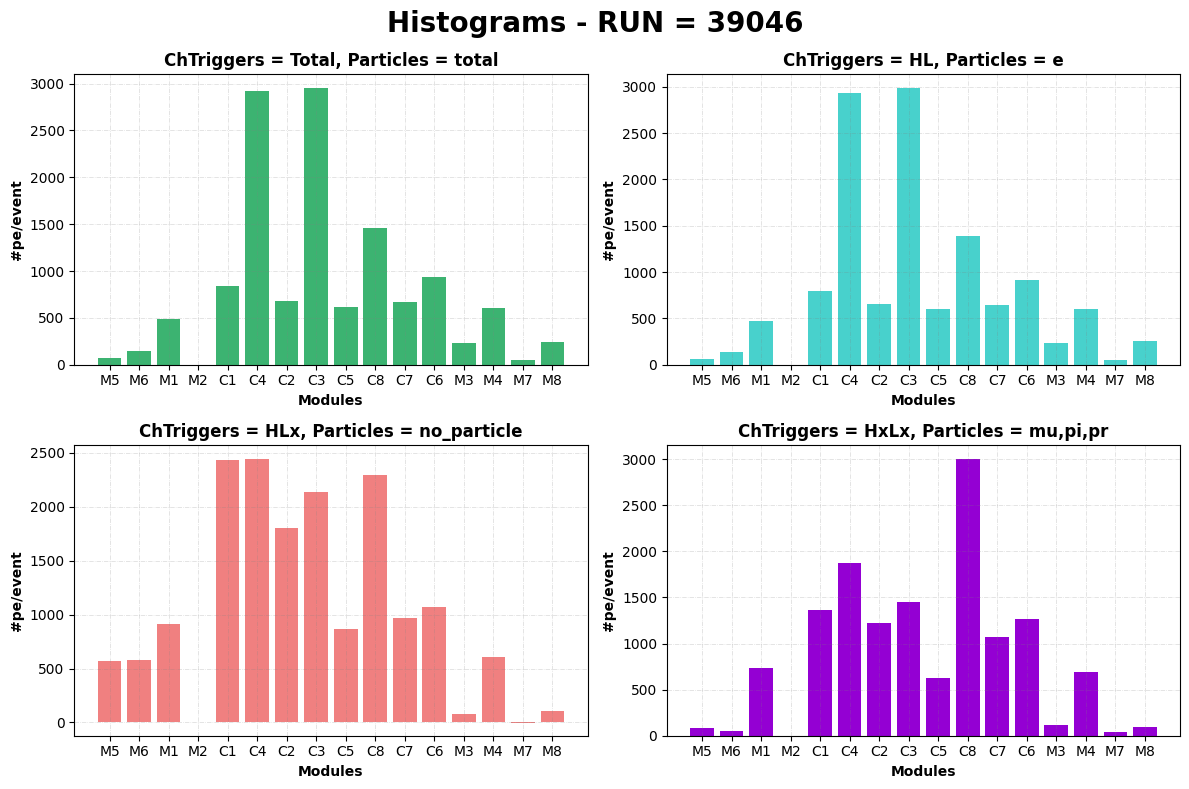

In [40]:
'''
HISTOGRAMS IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN
'''
#si potrebbe migliorare mettendo le variabili in una lista e facendo un ciclo for ma non ho il tempo per pensarci :)

#type of particle selected by all the Cherenkov triggers
part_total = df_run.iloc[0]['Part']
part_HL = df_run.iloc[1]['Part']
part_HLx = df_run.iloc[2]['Part']
part_HxLx = df_run.iloc[3]['Part']

#exctraction of the #pe for each module of each ch_trigger as an array
pes_total = df_run.iloc[0, 7:-1].to_numpy(dtype=np.float64)
pes_HL = df_run.iloc[1, 7:-1].to_numpy(dtype=np.float64)
pes_HLx = df_run.iloc[2, 7:-1].to_numpy(dtype=np.float64)
pes_HxLx = df_run.iloc[3, 7:-1].to_numpy(dtype=np.float64)

#histograms
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
    # - total
axs[0, 0].set_title('ChTriggers = {:}, Particles = {:}'.format('Total', part_total), fontweight='bold')
axs[0, 0].grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
axs[0, 0].bar(modules, pes_total, color='mediumseagreen')
axs[0, 0].set_xlabel('Modules', fontweight='bold')
axs[0, 0].set_ylabel('#pe/event', fontweight='bold')
    # - HL
axs[0, 1].set_title('ChTriggers = {:}, Particles = {:}'.format('HL', part_HL), fontweight='bold')
axs[0, 1].grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
axs[0, 1].bar(modules, pes_HL, color='mediumturquoise')
axs[0, 1].set_xlabel('Modules', fontweight='bold')
axs[0, 1].set_ylabel('#pe/event', fontweight='bold')
    # - HLx
axs[1, 0].set_title('ChTriggers = {:}, Particles = {:}'.format('HLx', part_HLx), fontweight='bold')
axs[1, 0].grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
axs[1, 0].bar(modules, pes_HLx, color='lightcoral')
axs[1, 0].set_xlabel('Modules', fontweight='bold')
axs[1, 0].set_ylabel('#pe/event', fontweight='bold')
    # - HxLx
axs[1, 1].set_title('ChTriggers = {:}, Particles = {:}'.format('HxLx', part_HxLx), fontweight='bold')
axs[1, 1].grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.3)
axs[1, 1].bar(modules, pes_HxLx, color='darkviolet')
axs[1, 1].set_xlabel('Modules', fontweight='bold')
axs[1, 1].set_ylabel('#pe/event', fontweight='bold')

plt.suptitle('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.tight_layout()
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DHist.png'.format(run))
plt.show()

Text(0, 0.5, '#pe/event')

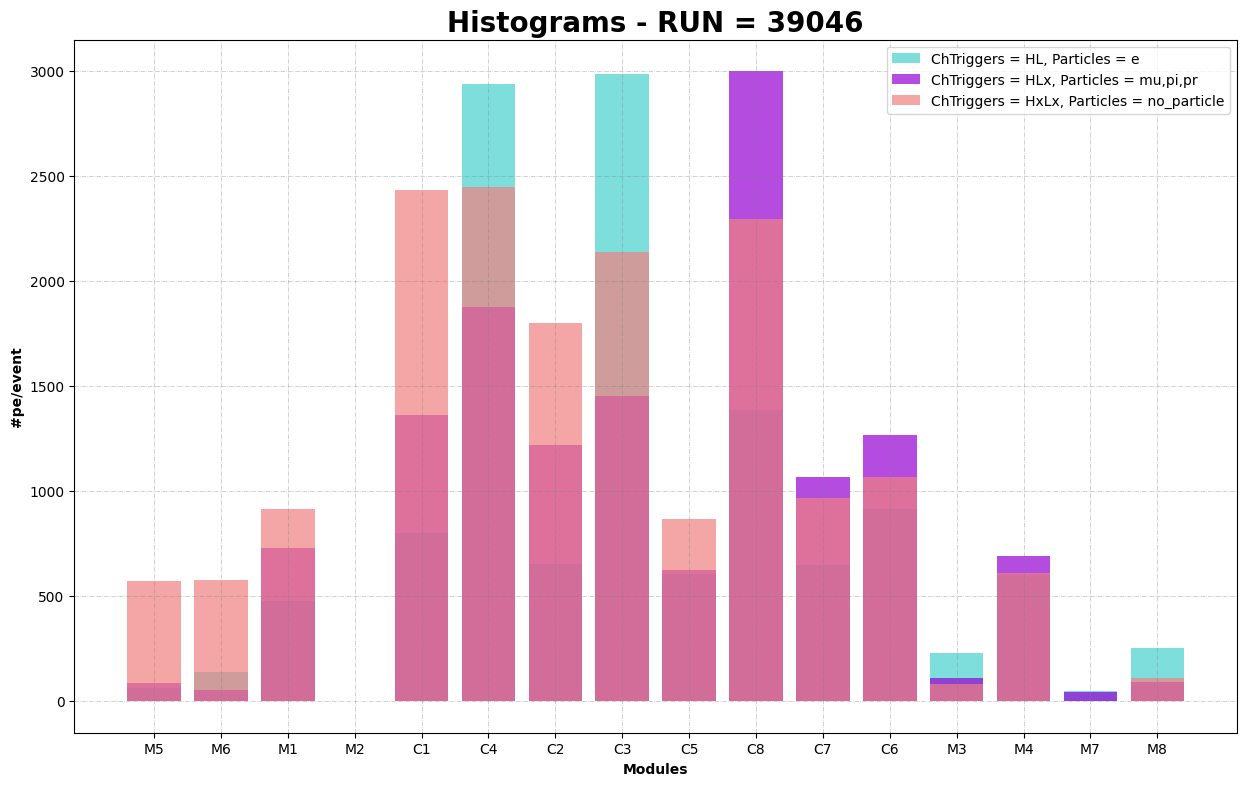

In [41]:
'''
HISTOGRAMS IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN TOGETHER FOR STATISTICS COMPARISON
'''

plt.figure(figsize=(15,9))
plt.title('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
plt.bar(modules, pes_HL, color='mediumturquoise', label='ChTriggers = {:}, Particles = {:}'.format('HL', part_HL), alpha=0.7)
plt.bar(modules, pes_HxLx, color='darkviolet', label='ChTriggers = {:}, Particles = {:}'.format('HLx', part_HxLx), alpha=0.7)
plt.bar(modules, pes_HLx, color='lightcoral', label='ChTriggers = {:}, Particles = {:}'.format('HxLx', part_HLx), alpha=0.7)
plt.legend()
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe/event', fontweight='bold')
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DTotalHist_bar.png'.format(run))

Text(0, 0.5, '#pe/event')

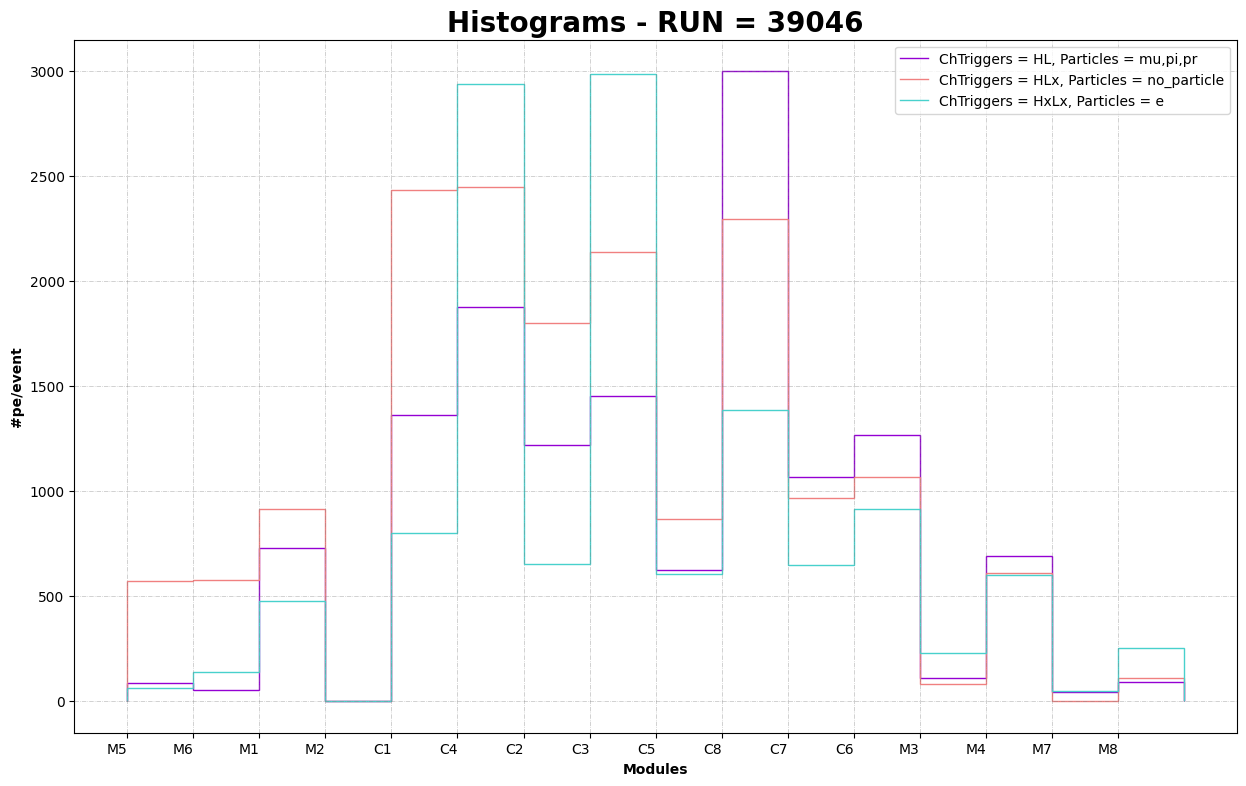

In [42]:
'''
HISTOGRAMS IN 2D - ALL TRIGGERS FOR THE CHOSEN RUN TOGETHER FOR STATISTICS COMPARISON
'''

plt.figure(figsize=(15,9))
plt.title('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
edges = np.linspace(0,16,17)
plt.stairs(pes_HxLx, edges, color='darkviolet', label='ChTriggers = {:}, Particles = {:}'.format('HL', part_HxLx))
plt.stairs(pes_HLx, color='lightcoral', label='ChTriggers = {:}, Particles = {:}'.format('HLx', part_HLx))
plt.stairs(pes_HL, color='mediumturquoise', label='ChTriggers = {:}, Particles = {:}'.format('HxLx', part_HL))
plt.xticks(edges[:-1])

plt.gca().set_xticklabels(modules)
for label in plt.gca().get_xticklabels():
    label.set_horizontalalignment('right')

plt.legend()
plt.xlabel('Modules', fontweight='bold')
plt.ylabel('#pe/event', fontweight='bold')
#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_2DTotalHist_stairs.png'.format(run))

In [43]:
'''
HISTOGRAMS IN 3D (LEGO PLOT) - ALL TRIGGERS FOR THE CHOSEN RUN
'''

#creates the map of the modules in the detector on a xy grid
modules_map = {
    'M1': (-2, 3), 'M2': (-2, 2), 'M5': (-2, 1), 'M6': (-2, 0),
    'C1': (0, 1), 'C4': (1, 3), 'C2': (2, 0), 'C3': (3, 2),
    'C5': (4, 1), 'C8': (5, 3), 'C7': (6, 2), 'C6': (6, 0),
    'M3': (9, 3), 'M4': (9, 2), 'M7': (9, 1), 'M8': (9, 0),
}

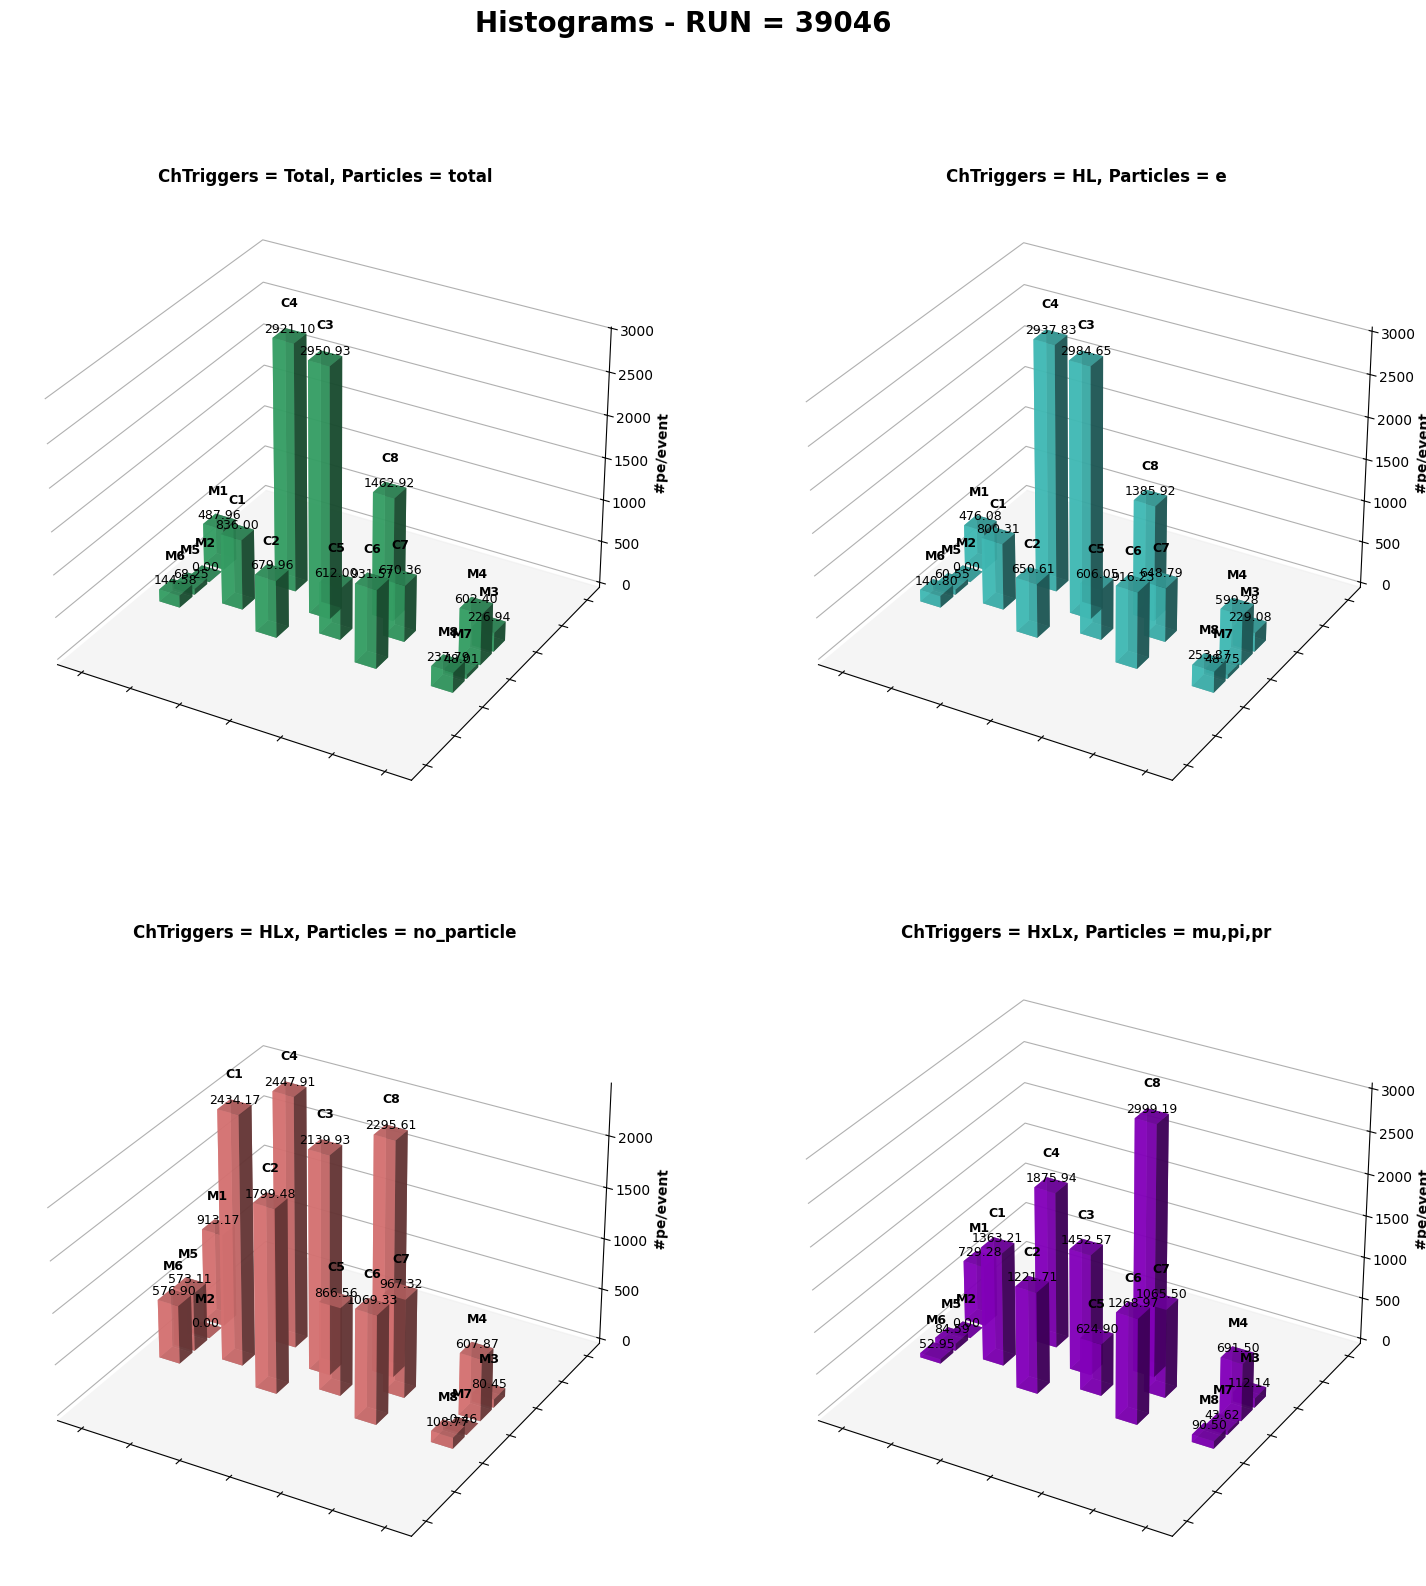

In [44]:
fig = plt.figure(figsize=(18, 18))
plt.suptitle('Histograms - RUN = {:}'.format(run), fontweight='bold', fontsize=20)
ax = fig.add_subplot(221, projection='3d')
bx = fig.add_subplot(222, projection='3d')
cx = fig.add_subplot(223, projection='3d')
ex = fig.add_subplot(224, projection='3d')

# Dimensioni dei cubi/barre
dx = dy = 0.85 
dz_total = pes_total
dz_HL = pes_HL
dz_HLx = pes_HLx
dz_HxLx = pes_HxLx

# Coord x, y presi dalla mappa
x = [modules_map[m][0] for m in modules]
y = [modules_map[m][1] for m in modules]
z = np.zeros(len(modules)) 
# Set limits of the mapping: x=(-3,11); y=(-1,5)
max_range = max(14, 6)
mid_x = 4
mid_y = 2

# Colori opzionali
color_total = ['mediumseagreen'] * len(modules)
color_HL = ['mediumturquoise'] * len(modules)
color_HLx = ['lightcoral'] * len(modules)
color_HxLx = ['darkviolet'] * len(modules)

    # - total
ax.bar3d(x, y, z, dx, dy, dz_total, color=color_total, alpha=0.8, shade=True)
ax.set_zlabel('#pe/event', fontweight='bold')
ax.set_title('ChTriggers = {:}, Particles = {:}'.format('Total', part_total), fontweight='bold')
for xi, yi, zi, label in zip(x, y, dz_total, modules):
    ax.text(xi + dx/2, yi + dy/2, zi + max(dz_total)*0.1,
            label, ha='center', va='bottom', fontsize=9, fontweight='bold') 
    ax.text(xi + dx/2, yi + dy/2, zi + zi*0.,
            f'{zi:.2f}', ha='center', va='bottom', fontsize=9) 
ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ax.xaxis.pane.set_visible(False)
ax.yaxis.pane.set_visible(False)
ax.xaxis._axinfo["grid"]['linewidth'] = 0
ax.yaxis._axinfo["grid"]['linewidth'] = 0
ax.set_xticklabels([]) 
ax.set_yticklabels([]) 

    # - HL
bx.bar3d(x, y, z, dx, dy, dz_HL, color=color_HL, alpha=0.8, shade=True)
bx.set_zlabel('#pe/event', fontweight='bold')
bx.set_title('ChTriggers = {:}, Particles = {:}'.format('HL', part_HL), fontweight='bold')
for xi, yi, zi, label in zip(x, y, dz_HL, modules):
    bx.text(xi + dx/2, yi + dy/2, zi + max(dz_HL)*0.1,
            label, ha='center', va='bottom', fontsize=9, fontweight='bold') 
    bx.text(xi + dx/2, yi + dy/2, zi + zi*0.,
            f'{zi:.2f}', ha='center', va='bottom', fontsize=9)
bx.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
bx.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
bx.xaxis.pane.set_visible(False)
bx.yaxis.pane.set_visible(False)
bx.xaxis._axinfo["grid"]['linewidth'] = 0
bx.yaxis._axinfo["grid"]['linewidth'] = 0
bx.set_xticklabels([]) 
bx.set_yticklabels([]) 

    # - HLx
cx.bar3d(x, y, z, dx, dy, dz_HLx, color=color_HLx, alpha=0.8, shade=True)
cx.set_zlabel('#pe/event', fontweight='bold')
cx.set_title('ChTriggers = {:}, Particles = {:}'.format('HLx', part_HLx), fontweight='bold')
for xi, yi, zi, label in zip(x, y, dz_HLx, modules):
    cx.text(xi + dx/2, yi + dy/2, zi + max(dz_HLx)*0.1,
            label, ha='center', va='bottom', fontsize=9, fontweight='bold')
    cx.text(xi + dx/2, yi + dy/2, zi + zi*0.,
            f'{zi:.2f}', ha='center', va='bottom', fontsize=9)
cx.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
cx.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
cx.xaxis.pane.set_visible(False)
cx.yaxis.pane.set_visible(False)
cx.xaxis._axinfo["grid"]['linewidth'] = 0
cx.yaxis._axinfo["grid"]['linewidth'] = 0
cx.set_xticklabels([]) 
cx.set_yticklabels([]) 

    # - HxLx
ex.bar3d(x, y, z, dx, dy, dz_HxLx, color=color_HxLx, alpha=0.8, shade=True)
ex.set_zlabel('#pe/event', fontweight='bold')
ex.set_title('ChTriggers = {:}, Particles = {:}'.format('HxLx', part_HxLx), fontweight='bold')
for xi, yi, zi, label in zip(x, y, dz_HxLx, modules):
    ex.text(xi + dx/2, yi + dy/2, zi + max(dz_HxLx)*0.1,
            label, ha='center', va='bottom', fontsize=9, fontweight='bold')
    ex.text(xi + dx/2, yi + dy/2, zi + zi*0.,
            f'{zi:.2f}', ha='center', va='bottom', fontsize=9)
ex.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ex.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ex.xaxis.pane.set_visible(False)
ex.yaxis.pane.set_visible(False)
ex.xaxis._axinfo["grid"]['linewidth'] = 0
ex.yaxis._axinfo["grid"]['linewidth'] = 0
ex.set_xticklabels([]) 
ex.set_yticklabels([]) 

#plt.savefig('/afs/cern.ch/work/l/liacob/public/saturation_hist/{:}_3DHist.png'.format(run))
#plt.tight_layout()
plt.show()

# NpeVSEnergy

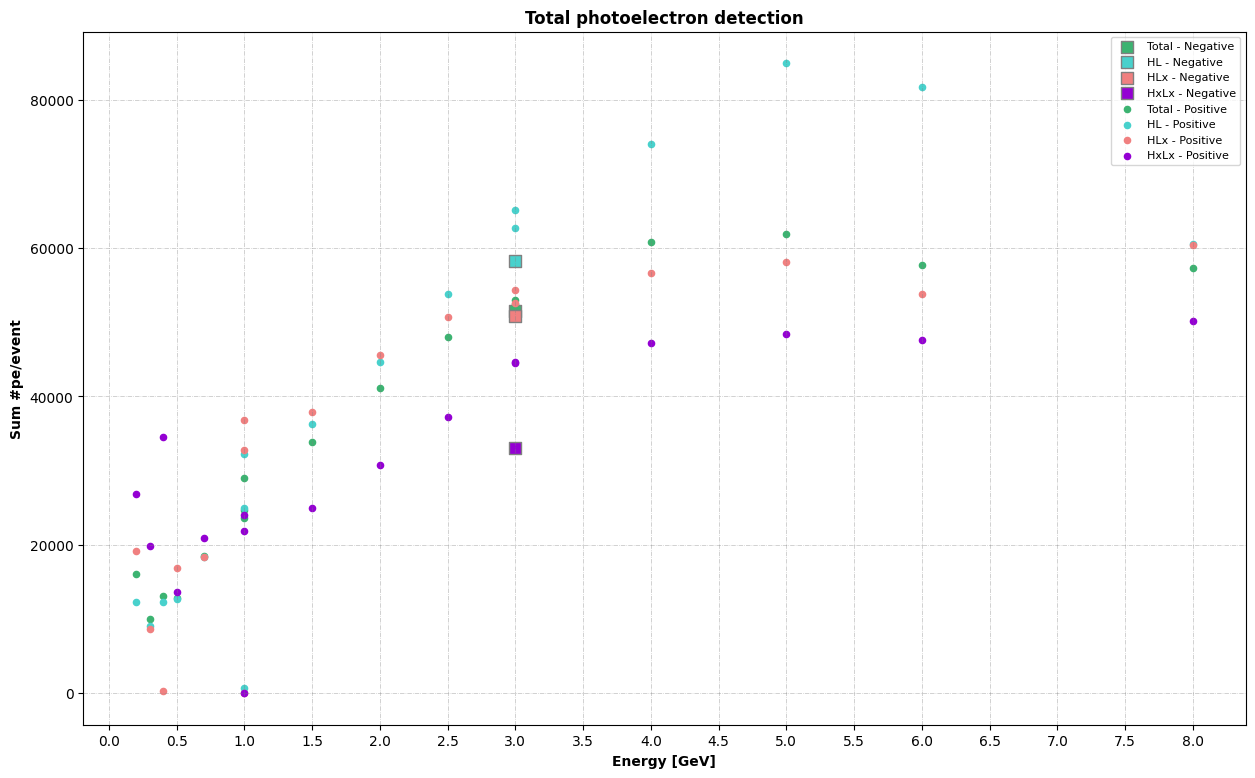

In [34]:
'''
#peVSE
'''

#plot (expected linear)

def make_plot(negative=False):
    run_list=[]
    energy=[]
    pe_sum_total=[]
    pe_sum_HL=[]
    pe_sum_HLx=[]
    pe_sum_HxLx=[]
    for j in range(0, len(df)-1, 4):
        if not negative and df.iloc[j,1] > 0:
            run_list.append(df.iloc[j,0])
            energy.append(df.iloc[j,1])
            pe_sum_total.append(df.iloc[j,-1]) # - total
            pe_sum_HL.append(df.iloc[j+1,-1]) # - HL
            pe_sum_HLx.append(df.iloc[j+2,-1]) # - HLx
            pe_sum_HxLx.append(df.iloc[j+3,-1]) # - HxLx      
        elif negative and df.iloc[j,1] < 0:
            run_list.append(df.iloc[j,0])
            energy.append(abs(df.iloc[j,1]))
            pe_sum_total.append(df.iloc[j,-1]) # - total
            pe_sum_HL.append(df.iloc[j+1,-1]) # - HL
            pe_sum_HLx.append(df.iloc[j+2,-1]) # - HLx
            pe_sum_HxLx.append(df.iloc[j+3,-1]) # - HxLx
    if not negative:
        plt.scatter(energy, pe_sum_total, color='mediumseagreen', label='Total - Positive', marker='.', s=80)
        plt.scatter(energy, pe_sum_HL, color='mediumturquoise', label='HL - Positive', marker='.', s=80)
        plt.scatter(energy, pe_sum_HLx, color='lightcoral', label='HLx - Positive', marker='.', s=80)
        plt.scatter(energy, pe_sum_HxLx, color='darkviolet', label='HxLx - Positive', marker='.', s=80)
    else:  
        plt.scatter(energy, pe_sum_total, color='mediumseagreen', marker="s", s=80, edgecolors='gray', label='Total - Negative')
        plt.scatter(energy, pe_sum_HL, color='mediumturquoise', marker="s", s=80, edgecolors='gray', label='HL - Negative')
        plt.scatter(energy, pe_sum_HLx, color='lightcoral', marker="s", s=80, edgecolors='gray', label='HLx - Negative')
        plt.scatter(energy, pe_sum_HxLx, color='darkviolet', marker="s", s=80, edgecolors='gray', label='HxLx - Negative')
    plt.legend(loc='best', fontsize=8)
    plt.xlabel('Energy [GeV]', fontweight='bold')
    xticks = np.arange(np.floor(min(energy)*2)/2, np.ceil(max(energy)*2)/2 + 0.5, 0.5)
    plt.xticks(xticks)
    plt.ylabel('Sum #pe/event', fontweight='bold')
    
plt.figure(figsize=(15,9))
plt.title('Total photoelectron detection'.format(run), fontweight='bold')
plt.grid(color='gray', linestyle='-.', linewidth=0.5, alpha=0.5)
make_plot(negative=True)
make_plot(negative=False)
#plt.savefig("modules_pe.png")
